<h1>Bernstein-Vazirani Algorithm </h1><br>
   
  consider a dark box which contains your password<br>
  Now,if you want to get the password inside the box, provided you cannot just simply into it or copy-paste it.<br>
  
  <h4>You have to choices either use a <b>Classical Computer</b> or use a <b>Quantum Computer</b></h4><br>  
  if the length of password is 'n' bits<br>
  Classsical computer will take n steps to generate the req. password (using AND operation bit by bit)<br>
  But, on the contrary Quantum computer will only take 1 step to get it (Bernstein-Vazirani Algorithm )<br>
  
 

In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [2]:
secretnumber='101001'

In [3]:
circuit=QuantumCircuit(len(secretnumber)+1,len(secretnumber))

# circuit.h([0,1,2,3,4,5])
# circuit.x(6)
# circuit.h(6)
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.z(len(secretnumber))

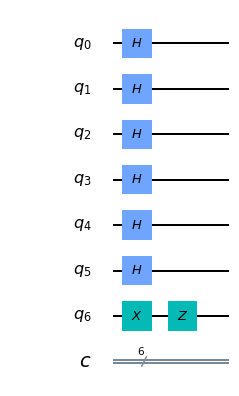

In [4]:
circuit.draw(output='mpl')

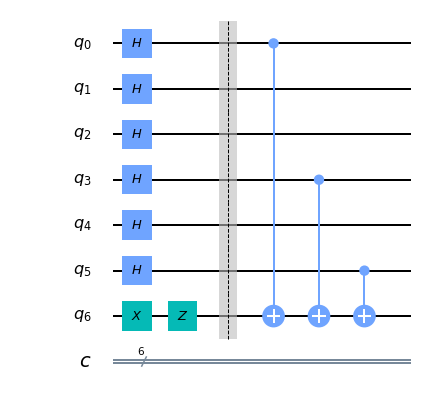

In [5]:
circuit.barrier()

for i,check in enumerate(reversed(secretnumber)):
    if check == '1':
        circuit.cx(i,len(secretnumber))
        

# circuit.cx(5,6)
# circuit.cx(2,6)
# circuit.cx(0,6)

circuit.draw(output='mpl')

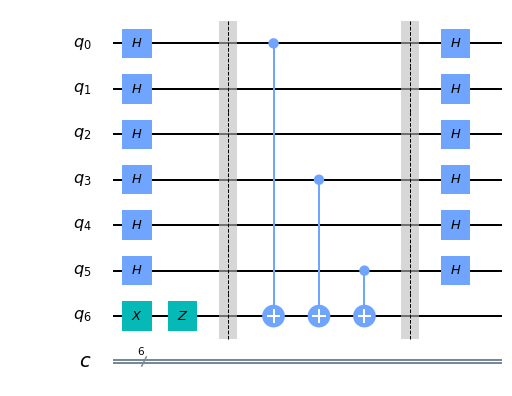

In [6]:
circuit.barrier()

circuit.h(range(len(secretnumber)))

circuit.draw(output='mpl')

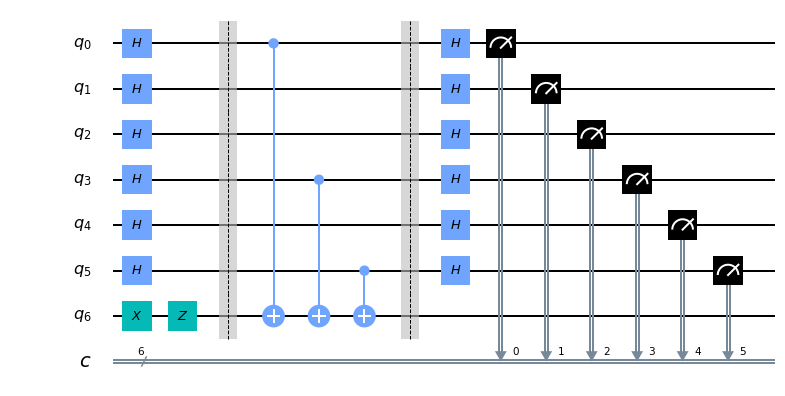

In [7]:
circuit.measure(range(len(secretnumber)),range(len(secretnumber)))

circuit.draw(output='mpl')

In [8]:
simulator=Aer.get_backend('qasm_simulator')
result=execute(circuit,backend=simulator,shots=1).result()
count=result.get_counts()

print(count)



{'101001': 1}
